# Exploratory Data Analysis Using Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Data

In [2]:
df = pd.read_csv('dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


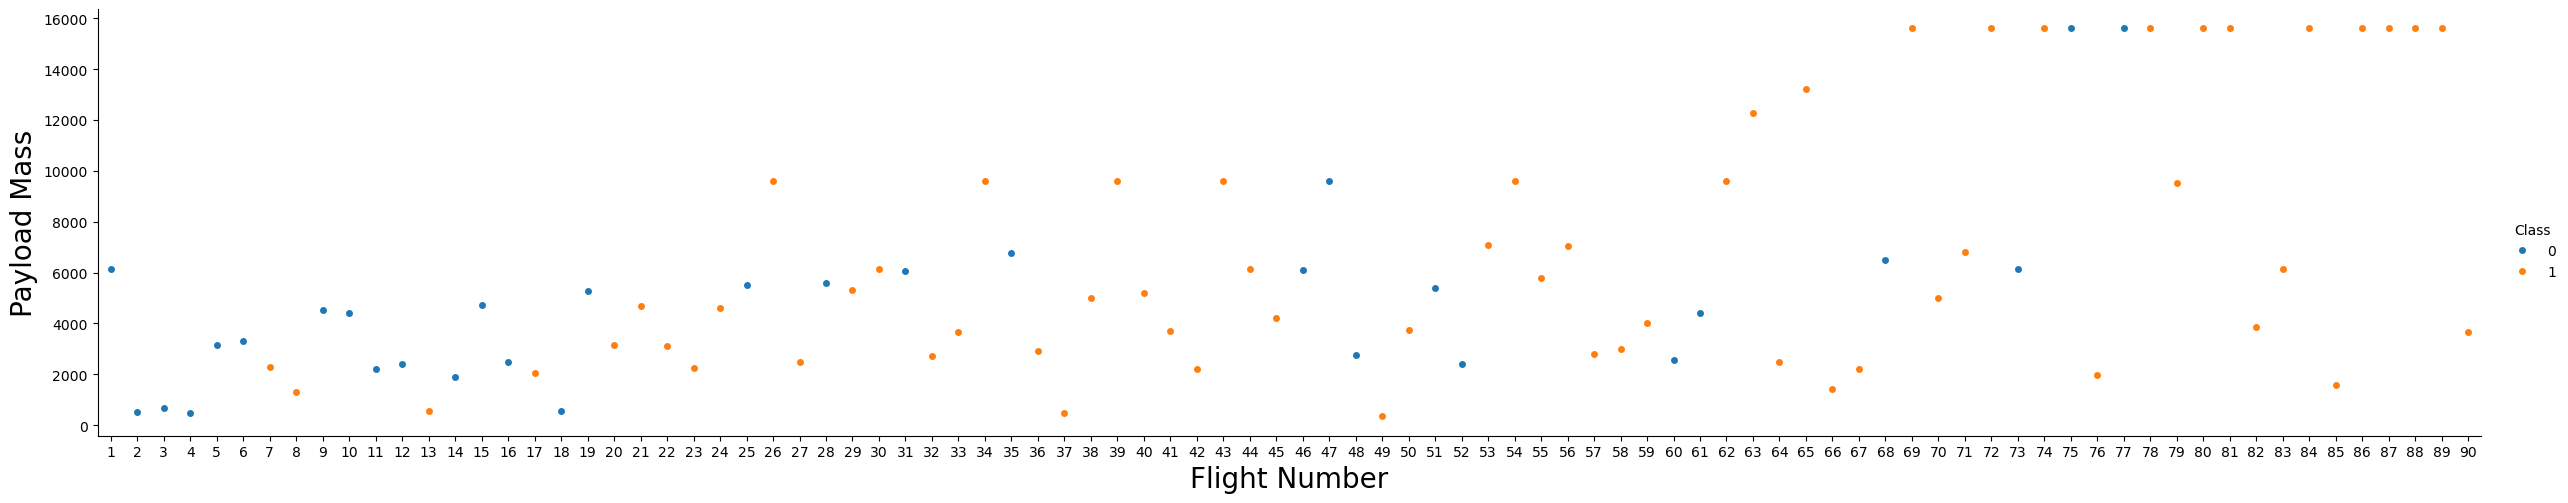

In [4]:
sns.catplot(data=df, x='FlightNumber', y='PayloadMass', hue='Class', aspect = 5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Payload Mass', fontsize=20)
plt.savefig('Charts/payload_flighnumber.png')
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


<hr>

### You need to go back here and understand what are they talking about

In [5]:
total_1 = (df['LaunchSite'] == 'VAFB SLC 4E').sum()
total_2 = (df['LaunchSite'] == 'KSC LC-39A').sum()

(total_2)/len(df)

np.float64(0.0)

In [6]:
total = 0
for i in range(len(df)):
    if df['LaunchSite'][i] == 'CCSFS SLC 40' and df['Class'][i] == 1:
        total = total + 1 

total/len(df)

0.36666666666666664

<hr>

Next, let's drill down to each site visualize its detailed launch records.


#### 1. Visualizing the relationship between Flight Number and Launch Site

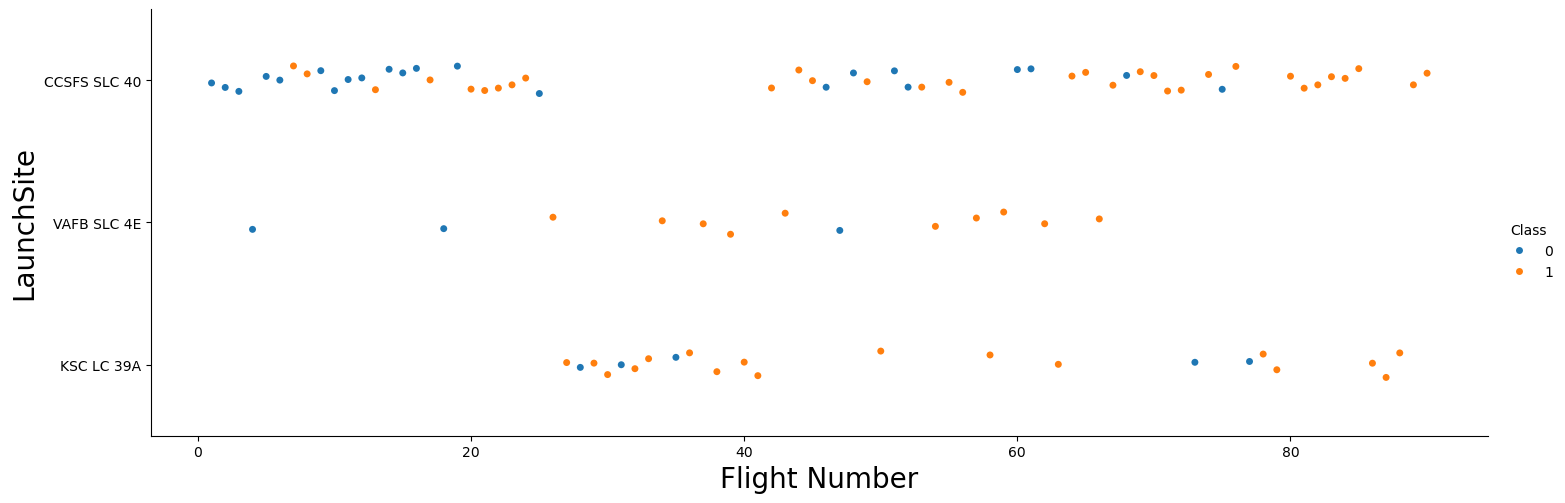

In [7]:
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.savefig('Charts/launchsites_flighnumber.png')
plt.show()

#### Ploting a scatter point chart Between FlightNumber and LaunchSite, hued by Class

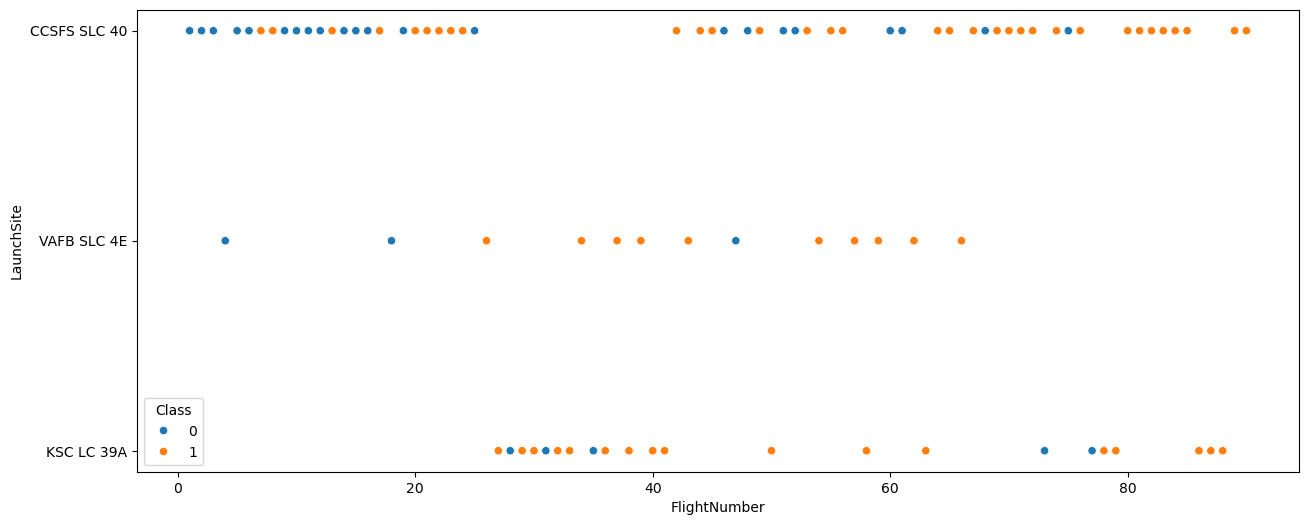

In [8]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')

plt.show()

We could easily notice here that 

1. Most of the launches used to be from `CCSFS SLC 40` site.
2. Hence, `CCSFS SLC 40` has the most number of launches.
3. And 'VAFB SLC 4E', has the fewest number of launches.

#### 2. Visualizing the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


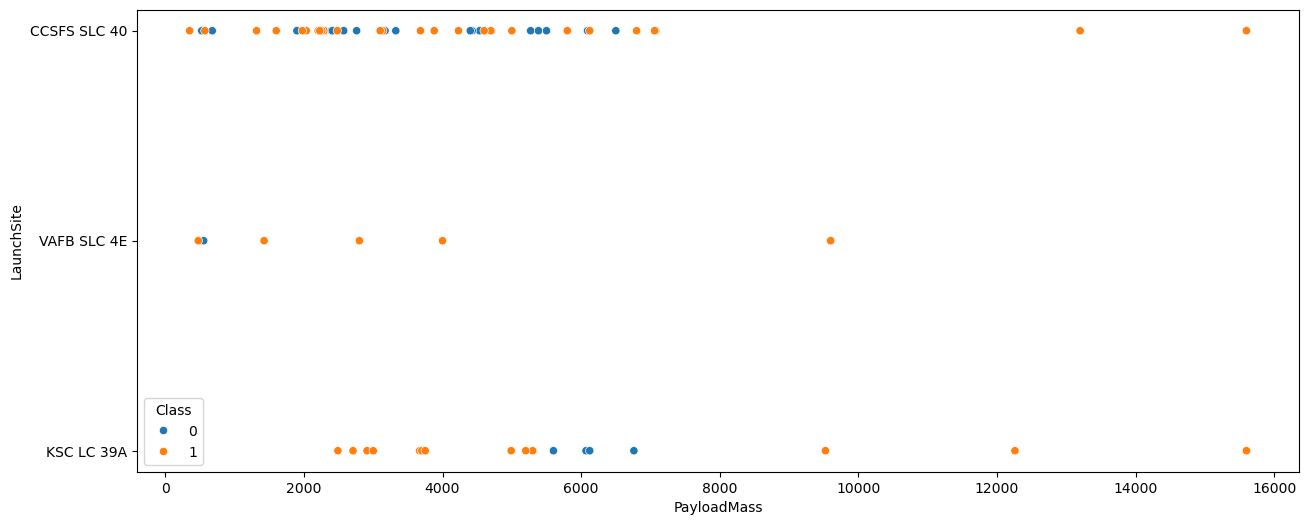

In [9]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')
plt.savefig('Charts/launchsites_payload.png')
plt.show()

Couple of things to notice out of this graph:

1. The Payload Mass of `VAFB SLC 4E` is somehow moderate, and it didn't exceed 10,000 KG.
2. Unlike both `KSC LC 39A` and `CCSFS SLC 40`, they held more payload mass.

#### 3. Visualizing the relationship between success rate of each orbit type


In [10]:
grouped_data = df.groupby('Orbit')['Class'].mean().reset_index()

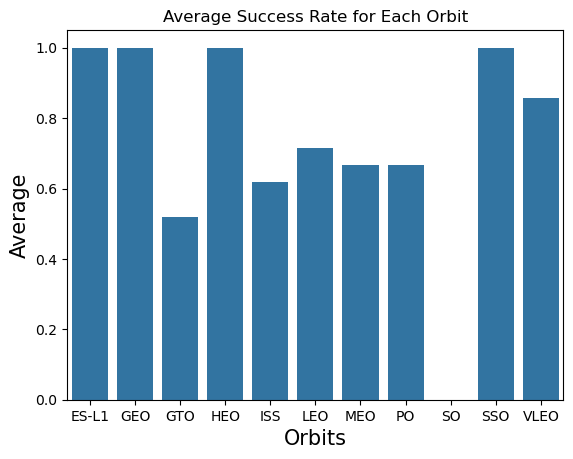

In [11]:
sns.barplot(data=grouped_data, x='Orbit', y='Class')
plt.xlabel("Orbits", fontsize=15)
plt.ylabel("Average", fontsize=15)
plt.title("Average Success Rate for Each Orbit")
plt.savefig('Charts/avg_orbit_success_rate.png')
plt.show()

We could conclude that `ES-L1`, `GEO`, `HEO` and `SSO` have the highest success rate among the orbits.


#### 4. Visualizing the relationship between FlightNumber and Orbit type

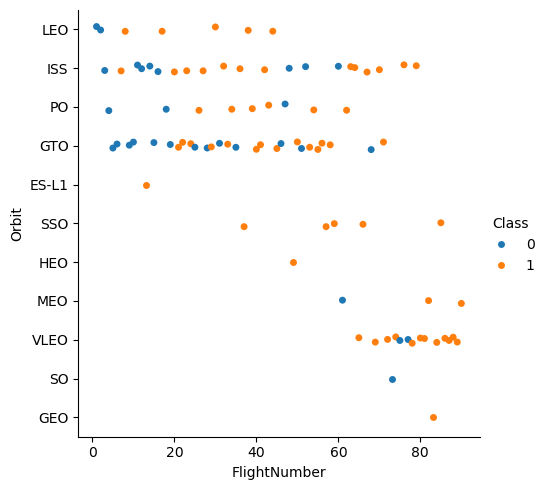

In [12]:
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.savefig('Charts/orbit_flightnumber.png')
plt.show()

We may derive from this graph the following:

1. Though that the `GEO` and `ES-L1` orbit has 100% success rates, but both had only one flight. So I wouldn't consider them to be good indicators.

2. `SSO` is might be a good indicator, since it has 5 flights, with a 100% success rate.

3. The overall progress is evolving through the increasing of Flight Numbers.

4. Hence, `LEO's` success rate relates to the number of flight. As number of flight increased, the success rate increased.

5. And finally, There's no relation between flight number and `GTO` orbit.

#### 5. Visualizing the relationship between Payload and Orbit type

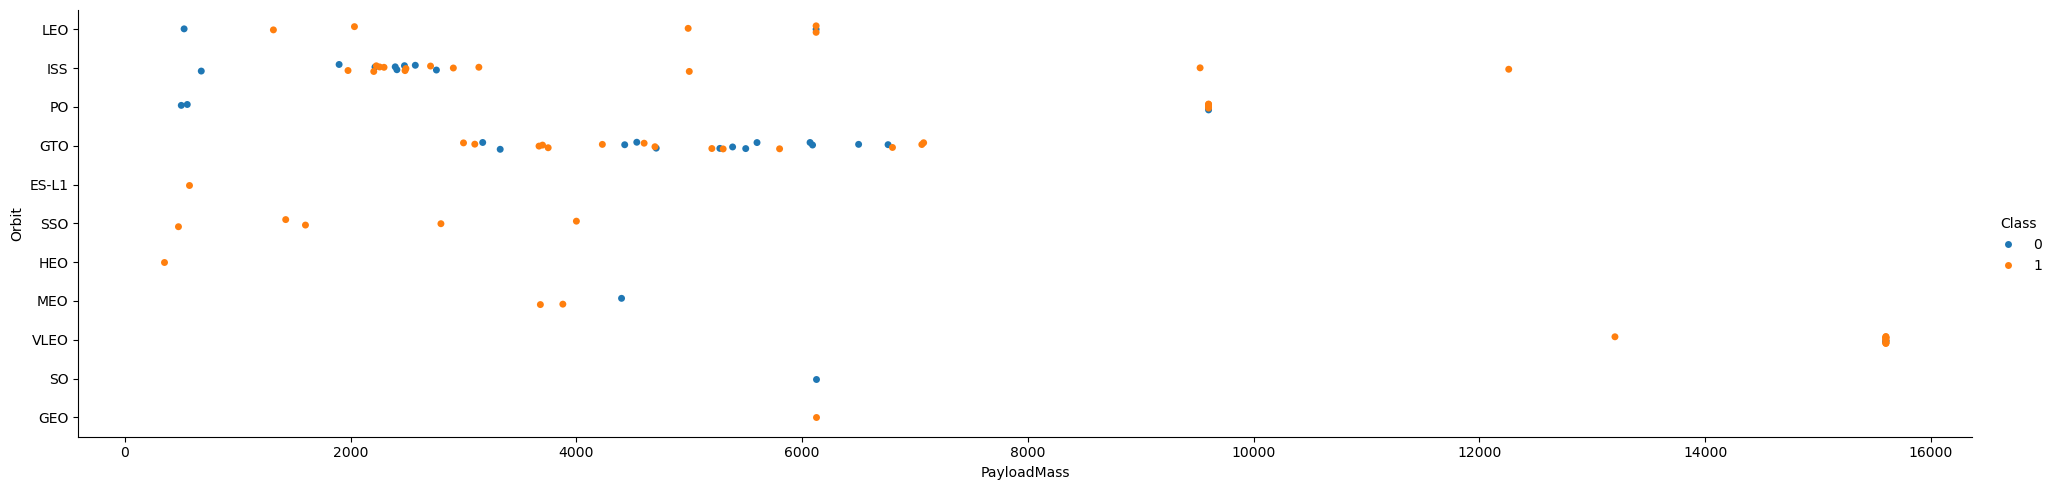

In [13]:
sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Class', aspect=4, height=5)
plt.savefig('Charts/payload_orbit.png')
plt.show()

With heavy Payload Mass, the successful landing rates are more for `LEO`, `PO` and `ISS`.

#### 6. Visualizing the launch success yearly trend

In [14]:
year = []

for i in range(len(df)):
    year.append(df['Date'][i][:4])
    
    
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [15]:
averaged_success_rate = df.groupby('Date')['Class'].mean().reset_index()

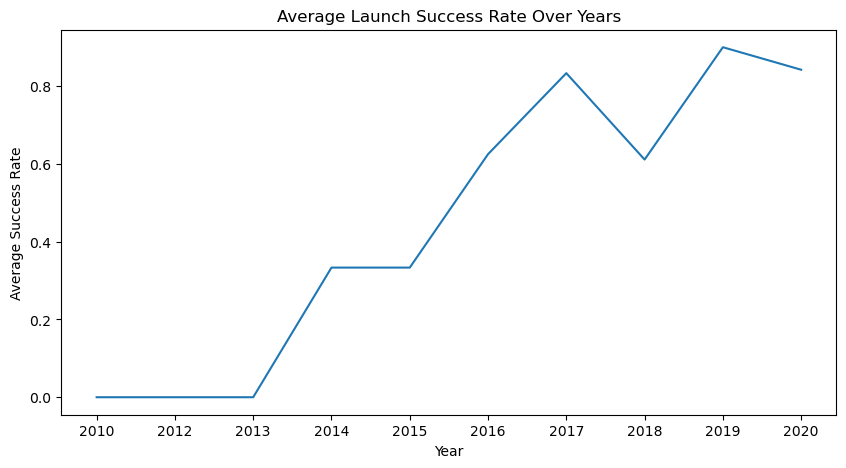

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=averaged_success_rate, x='Date', y='Class')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Average Launch Success Rate Over Years')
plt.savefig('Charts/avg.png')
plt.show()

It's evident from the line chart above that the success rate kept increasing from 2013 till 2019.

## Feature Engineering

By now, we should have some preliminary insights about the important variables and how would they affect the outcome. We shall select features that will be used in success prediction in the `Modeling phase.`

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### 7. Create dummy variables to categorical columns

In [18]:
features_one_hot = pd.get_dummies(features, columns=['LaunchSite', 'Orbit', 'LandingPad', 'Serial', 'GridFins', 'Reused', 'Legs'])

features_one_hot

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,Orbit_ES-L1,Orbit_GEO,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6123.547647,1,1.0,0,True,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,2,525.000000,1,1.0,0,True,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,677.000000,1,1.0,0,True,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
3,4,500.000000,1,1.0,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
4,5,3170.000000,1,1.0,0,True,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,5.0,12,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,True
86,87,15600.000000,3,5.0,13,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,True
87,88,15600.000000,6,5.0,12,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
88,89,15600.000000,3,5.0,12,True,False,False,False,False,...,False,False,True,False,False,True,False,True,False,True


In [19]:
# Concatenating the features.

features = pd.concat([features, features_one_hot], axis=1)

features

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,True,False,True,False,True,False
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,True,False,True,False,True,False
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,True,False,True,False,True,False
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,...,False,False,False,False,True,False,True,False,True,False
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,...,False,False,True,False,False,True,False,True,False,True
86,87,15600.000000,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,...,True,False,False,False,False,True,False,True,False,True
87,88,15600.000000,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,...,False,False,False,False,False,True,False,True,False,True
88,89,15600.000000,VLEO,CCSFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,...,False,False,True,False,False,True,False,True,False,True


#### 8. Cast all numeric columns to `float64`

In [20]:
features_one_hot = features_one_hot.astype('float64')

### Exporting the feature_one_hot dataframe into a csv file

In [21]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)